# <center>**Đồ án 3: Linear Regression**</center>

# Thông tin sinh viên

- Họ và tên: Đặng Hà Huy
- MSSV: 21127296
- Lớp: 21CLC05

# Import

In [37]:
import pandas as pd
import numpy as np

# Import thêm dữ thư viện nếu cần
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu

In [38]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa các đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu kiểm tra)

X_test = test.iloc[:, :-1]      # Dataframe (chứa các đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [39]:
# Cài đặt các hàm cần thiết ở đây

# Lớp hồi quy tuyến tính
class OLSLinearRegression:
  def fit(self, X, y):
    X_pinv = np.linalg.inv(X.T @ X) @ X.T    # np.linalg.pinv(X)
    self.w = X_pinv @ y
    return self

  def get_params(self):
    return self.w

  def predict(self, X):
    return np.sum(self.w.ravel() * X, axis=1)

In [40]:
def MAE(y, y_hat):
  '''
  MAE (Mean Absolute Error) calculation function

  Input:
    y: the actual target values
    y_hat: the predicted values

  Output:
    The MAE value of between the actual target values (y) and the predicted values (y_hat)
  '''
  return np.mean(np.abs(y.ravel() - y_hat.ravel()))

In [41]:
def cross_validation(dataset, k = 5):
  '''
  Cross validate the dataset according to the number of k fold

  Input:
    data: the the entire dataset, last column is the target variable (y), preceding columns are features (X)
    k: the number of fold for cross validation

  Output:
    maes_avg: An array of average MAE values for each feature
  '''
  num_samples, num_features = dataset.shape
  models_list = np.array_split(dataset, k)
  maes_avg = np.zeros(num_features - 1)

  for i in range(k):
    maes_list = []
    test_set = models_list[i]                                         # Chọn tập test tại vị trí i hiện tại
    train_set = np.concatenate(models_list[:i] + models_list[i + 1:]) # Các tập còn lại nối lại với nhau tạo thành tập huấn luyện

    k_fold_x_train, k_fold_y_train = train_set[:, :-1], train_set[:, -1]
    k_fold_x_test, k_fold_y_test = test_set[:, :-1], test_set[:, -1]

    for ctrain, ctest in zip(k_fold_x_train.T, k_fold_x_test.T):
      temp_model = OLSLinearRegression().fit(ctrain[:, None], k_fold_y_train)
      y_predict = temp_model.predict(ctest[:, None])
      maes_list.append(MAE(k_fold_y_test, y_predict))

    maes_avg += maes_list
  maes_avg /= k

  return maes_avg

In [42]:
def shuffle(data):
  '''
  shuffle the data randomly

  Input:
    data: the dataset that need to be shuffle

  Output:
    data_shuffled: the data that have been shuffled
  '''
  data_shuffled = np.array(data)
  np.random.shuffle(data_shuffled)
  return data_shuffled

In [43]:
def correlation_filter(dataset, threshold):
  '''
  Filter out all of the features that have a correlation exceed the given threshold

  Input:
    dataset: the the entire dataset that to want to filter out
    threshold: the threshold of correlation you want to filter out the feature

  Output:
    filter_features: the features that have high correlation and will be filter out
  '''
  filter_features = []
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) > threshold: # Xét ngưỡng tương quan bằng giá trị tuyệt đối
        filter_features.append(corr_matrix.columns[i])
  return filter_features

# Yêu cầu 1a: Sử dụng toàn bộ 11 đặc trưng đầu tiên `Gender`, `10percentage`, `12percentage`, `CollegeTier`, `Degree`, `collegeGPA`, `CollegeCityTier`, `English`, `Logical`, `Quant`, `Domain` (2 điểm)

In [44]:
# Phần code cho yêu cầu 1a
# Lấy 11 đặc trưng từ tập train và test
X_train_first_11 = X_train.iloc[:, :11]
X_test_first_11 = X_test.iloc[:, :11]

# Huấn luyện mô hình với tập train 11 đặc trưng đầu
model_first_11 = OLSLinearRegression().fit(X_train_first_11, y_train)
model_first_11.get_params()

0    -22756.512821
1       804.503156
2      1294.654565
3    -91781.897531
4     23182.388679
5      1437.548672
6     -8570.661985
7       147.858299
8       152.888476
9       117.221846
10    34552.286221
dtype: float64

In [45]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
y_hat_first_11 = model_first_11.predict(X_test_first_11)
print("MAE:", MAE(y_test, y_hat_first_11))

MAE: 104863.77754032997


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -22756.513 * \text{Gender} + 804.503* \text{10percentage} + 1294.655* \text{12percentage} - 91781.898* \text{CollegeTier} + 23182.389 * \text{Degree} + 1437.549 * \text{collegeGPA} - 8570.662 * \text{CollegeCityTier} + 147.858 * \text{English} + 152.888 * \text{Logical} + 117.222 * \text{Quant} + 34552.286 * \text{Domain}$$

# Yêu cầu 1b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng tính cách với các đặc trưng tính cách gồm `conscientiousness`, `agreeableness`, `extraversion`, `nueroticism`, `openess_to_experience`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [46]:
# Phần code cho yêu cầu 1b
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu

# Xác định tập những đặc trưng cần tìm và lấy các đặc trưng đó từ tập train
personalities = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Salary']
train_personalities = train.loc[:, personalities]

# Xáo trộn data
shuffle_personalities = shuffle(train_personalities)
maes_personalities = cross_validation(shuffle_personalities, k = 5)

# Chọn index của tính cách tốt nhất (tính cách có giá trị MAE thấp nhất)
best_personality_index = np.argmin(maes_personalities)
best_personality, best_mae = personalities[best_personality_index], maes_personalities[best_personality_index]

# In ra tính cách tốt nhất và giá trị MAE trung bình của tính cách đó
print(f"Best personality: {best_personality}")
print(f"MAE: {best_mae}")

# In ra bảng 5 tính cách theo đề bài và giá trị MAE trung bình của tính cách đó
table = [[personality, mae] for personality, mae in zip(personalities, maes_personalities)]
pd.DataFrame(table, columns=['Model with 1 personality', 'MAE'])

Best personality: nueroticism
MAE: 299357.41529589356


,Model with 1 personality,MAE
0,conscientiousness,306159.173500
1,agreeableness,300784.992448
2,extraversion,306850.274580
3,nueroticism,299357.415296
4,openess_to_experience,303042.887651


In [47]:
# Huấn luyện lại mô hình best_personality_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
# Dùng đặc trưng tốt nhất đã tìm ở trên và lấy từ trong tập X_train và X_test
X_train_best_personality = X_train.loc[:, best_personality].to_frame()
X_test_best_personality = X_test.loc[:, best_personality].to_frame()

# Huấn luyện mô hình với tính cách tốt nhất trong tập train
best_personality_feature_model = OLSLinearRegression().fit(X_train_best_personality, y_train)
best_personality_feature_model.get_params()

0   -56546.303753
dtype: float64

In [48]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_personality_feature_model
y_best_personality_hat = best_personality_feature_model.predict(X_test_best_personality)
print("MAE: ", MAE(y_test, y_best_personality_hat))

MAE:  291019.693226953


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -56546.304 * \text{Nueroticism}$$

# Yêu cầu 1c: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng `English`, `Logical`, `Quant`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [49]:
# Phần code cho yêu cầu 1c
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu

# Xác định tập những đặc trưng cần tìm và lấy các đặc trưng đó từ tập train
skills = ['English', 'Logical', 'Quant', 'Salary']
train_skills = train.loc[:, skills]

# Xáo trộn data
shuffle_skills = shuffle(train_skills)
maes_skills = cross_validation(shuffle_skills, k = 5)

# Chọn index của kĩ năng tốt nhất (kĩ năng có giá trị MAE thấp nhất) v
best_skill_index = np.argmin(maes_skills)
best_skill, best_mae = skills[best_skill_index], maes_skills[best_skill_index]

# In ra kĩ năng tốt nhất và giá trị MAE trung bình của kĩ năng đó
print(f"Best skill: {best_skill}")
print(f"MAE: {best_mae}")

# In ra bảng 3 kĩ năng theo đề bài và giá trị MAE trung bình của kĩ năng đó
table = [[skill, mae] for skill, mae in zip(skills, maes_skills)]
pd.DataFrame(table, columns=['Model with 1 skill', 'MAE'])

Best skill: Quant
MAE: 118088.87884425477


,Model with 1 skill,MAE
0,English,121858.008395
1,Logical,120232.715451
2,Quant,118088.878844


In [50]:
# Huấn luyện lại mô hình best_skill_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
# Dùng đặc trưng tốt nhất đã tìm ở trên và lấy từ trong tập X_train và X_test
X_train_best_skill = X_train.loc[:, best_skill].to_frame()
X_test_best_skill = X_test.loc[:, best_skill].to_frame()

# Huấn luyện mô hình với kĩ năng tốt nhất trong tập train
best_skill_feature_model = OLSLinearRegression().fit(X_train_best_skill, y_train)
print(best_skill_feature_model.get_params())

0    585.895381
dtype: float64


In [51]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_skill_feature_model
y_best_skill_hat = best_skill_feature_model.predict(X_test_best_skill)
print("MAE: ", MAE(y_test, y_best_skill_hat))

MAE:  106819.57761989674


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 585.895 * \text{Quant}$$

# Yêu cầu 1d: Sinh viên tự xây dựng mô hình, tìm mô hình cho kết quả tốt nhất (3 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

## Tìm mô hình

In [52]:
# Trình bày các phần tìm ra mô hình

In [53]:
# Mô hình 1: Sử dụng đặc trưng có giá trị MAE nhỏ hơn 200000
# Lấy ra tất cả tên các đặc trưng và tạo thành một danh sách
model1_features = train.columns.tolist()
model1_features.remove('Salary') # Bỏ đi vì Salary là giá trị mục tiêu và không cần tính toán

model1_mae = []                     # Sẽ chứa toàn bộ các đặc trưng cùng giá trị MAE của đặc trưng đó
model1_features_with_mae = []       # Sẽ chứa toàn bộ các đặc trưng cùng giá trị MAE của đặc trưng đó sau khi loại bỏ các đặc trưng có mae > 200000
my_model1 = []                      # Sẽ chứa toàn bộ các đặc trưng sau khi loại bỏ các đặc trưng có mae > 200000

for feature in model1_features:
  X_train_model1 = train[feature].values.reshape(-1, 1)
  X_test_model1 = test[feature].values.reshape(-1, 1)

  model2_1_feature = OLSLinearRegression().fit(X_train_model1, y_train)
  y_test_model2_hat = model2_1_feature.predict(X_test_model1)
  feature_mae = MAE(y_test, y_test_model2_hat)

  model1_mae.append([feature, feature_mae])

model1_mae = sorted(model1_mae, key=lambda x: x[1])
for feature_row in model1_mae:
  if feature_row[1] > 200000:
    break
  else:
    model1_features_with_mae.append(feature_row)
    my_model1.append(feature_row[0])

pd.DataFrame(model1_features_with_mae, columns=['Features', 'MAE'])

,Features,MAE
0,Quant,106819.577620
1,12percentage,111427.175482
2,10percentage,111941.803536
3,collegeGPA,114600.224618
4,Logical,115082.021387
5,English,117213.928965
6,CollegeTier,126802.148183
7,Degree,132669.852864
8,Gender,143583.739602
9,ComputerProgramming,153100.424596


In [54]:
print(my_model1)

['Quant', '12percentage', '10percentage', 'collegeGPA', 'Logical', 'English', 'CollegeTier', 'Degree', 'Gender', 'ComputerProgramming', 'Domain']


In [55]:
# Phương trình hồi quy của model 1
X_train_model1 = train.loc[:, my_model1]
y_train_model1 = train.iloc[:, -1]

model1 = OLSLinearRegression().fit(X_train_model1, y_train_model1)
model1.get_params()

0       118.216153
1      1182.287207
2       895.933118
3      1333.176343
4       139.036379
5       139.311223
6    -89585.622331
7     17267.986790
8    -23440.703979
9        68.023963
10    25926.671077
dtype: float64

Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012) của model 1

$$\text{Salary} = 118.216 * \text{Quant} + 1182.287 * \text{12percentage} + 895.933 * \text{10percentage} + 1333.176 * \text{collegeGPA} + 139.036 * \text{Logical} + 139.311 * \text{English} - 89585.622 * \text{CollegeTier} + 17267.987 * \text{Degree} -23440.704 * \text{Gender} + 68.024 * \text{ComputerProgramming} + 25926.671 * \text{Domain}$$

In [56]:
# Mô hình 2: Sử dụng đặc trưng có độ tương quan với Lương lớn hơn 0.05
my_model2 = []
model2_with_cor = []
target = train['Salary']
features = train.drop(columns='Salary')

correlations = abs(features.corrwith(target))
correlations_sorted = sorted((correlations.items()), key=lambda x: x[1], reverse=True)

for i in range(len(correlations_sorted)):
  if(correlations_sorted[i][1]) > 0.05:
    my_model2.append(correlations_sorted[i][0])
    model2_with_cor.append([correlations_sorted[i][0], correlations_sorted[i][1]])

pd.DataFrame(model2_with_cor, columns=['Feature', 'Correlation'])

,Feature,Correlation
0,Quant,0.205358
1,Logical,0.188416
2,CollegeTier,0.174824
3,English,0.169293
4,10percentage,0.155174
5,12percentage,0.149531
6,ComputerProgramming,0.125866
7,collegeGPA,0.122469
8,Domain,0.122022
9,ComputerScience,0.095507


In [57]:
print(my_model2)

['Quant', 'Logical', 'CollegeTier', 'English', '10percentage', '12percentage', 'ComputerProgramming', 'collegeGPA', 'Domain', 'ComputerScience', 'nueroticism', 'agreeableness', 'conscientiousness']


In [58]:
# Phương trình hồi quy của model 2
X_train_model2 = train.loc[:, my_model2]
y_train_model2 = train.iloc[:, -1]

model2 = OLSLinearRegression().fit(X_train_model2, y_train_model2)
model2.get_params()

0       110.103254
1       128.359541
2    -81441.646930
3       150.449833
4       705.996554
5       951.608458
6       102.502612
7      1479.717445
8     21946.267633
9      -161.448398
10   -10623.850936
11    14638.231791
12   -21020.657245
dtype: float64

Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012) của model 2

$$\text{Salary} = 110.103 * \text{Quant} + 128.360 * \text{Logical} - 81441.647 * \text{CollegeTier} + 150.450 * \text{English} + 705.997 * \text{10percentage} + 951.608 * \text{12percentage} + 102.503 * \text{ComputerProgramming} + 1479.717 * \text{CollegeGPA} + 21946.268 * \text{Domain} - 161.448 * \text{ComputerScience} - 10623.851 * \text{nueroticism} + 14638.231791 * \text{agreeableness} - 21020.657 * \text{conscientiousness}$$

<Axes: >

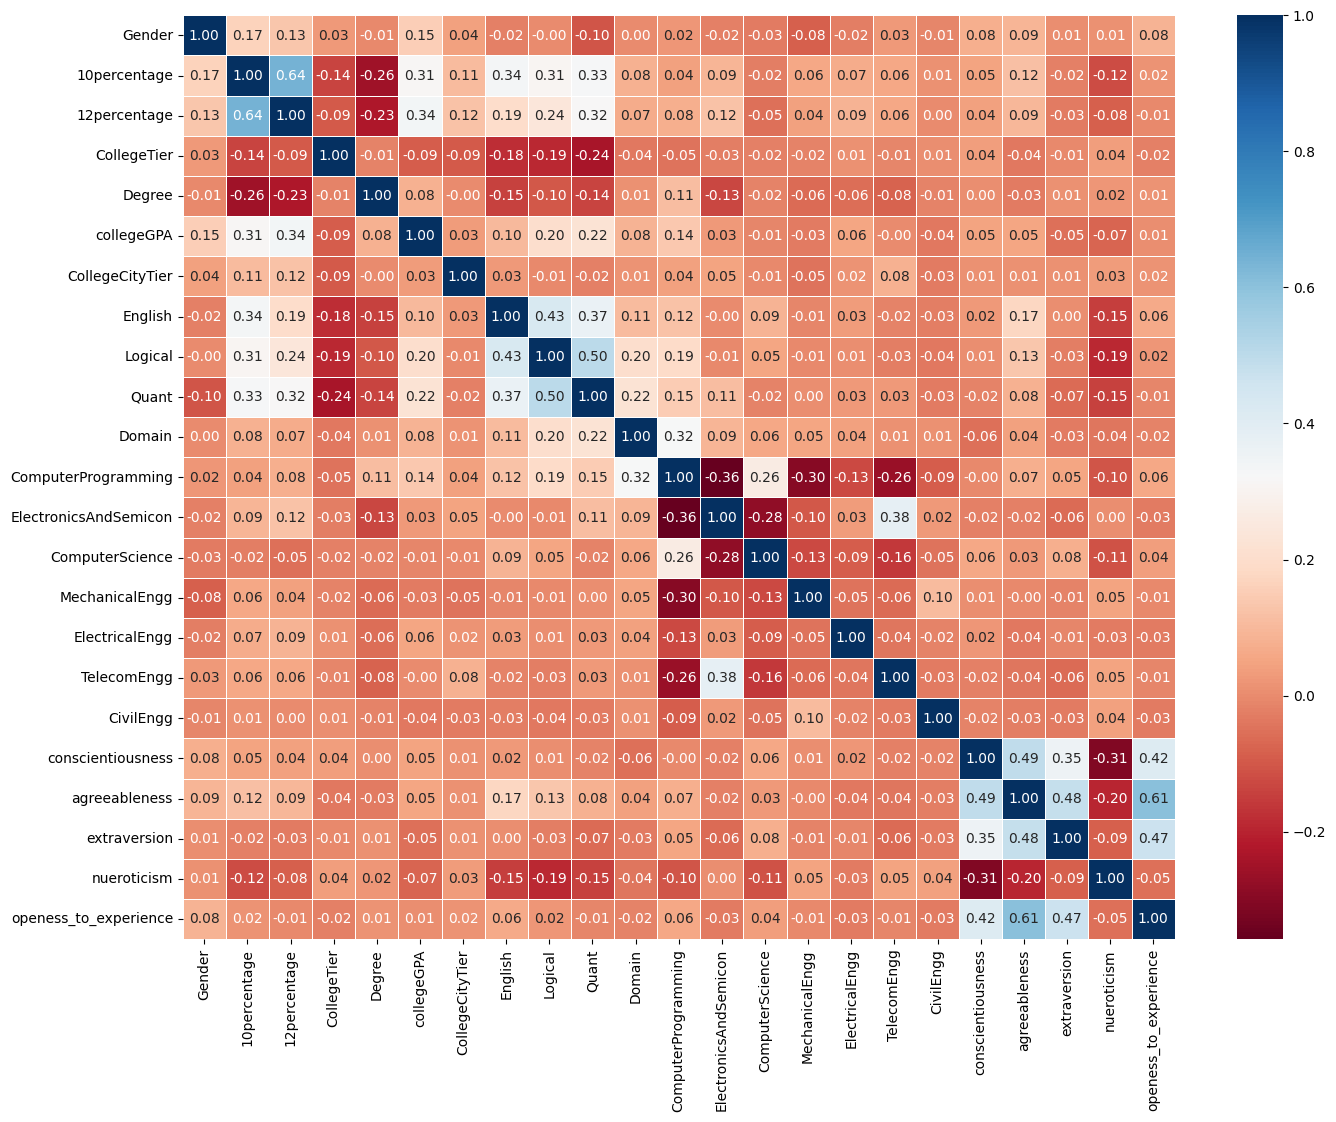

In [59]:
# Mô hình 3: Sử dụng đặc trưng có độ tương quan với nhau dưới 0.25
correlation_matrix = X_train.corr()
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap="RdBu", annot=True, fmt='.2f', linewidth = .5, ax = ax)

In [60]:
# Filter out all the features that have correlation higher than 0.25
my_model3 = []
correlated_features = correlation_filter(X_train, 0.25)

# Remove all of the filtered features
my_model3 = X_train.drop(correlated_features, axis=1).columns.values.tolist()
print(my_model3)

['Gender', '10percentage', 'CollegeTier', 'CollegeCityTier', 'Domain', 'ElectricalEngg', 'CivilEngg', 'conscientiousness']


In [61]:
# Phương trình hồi quy của model 3
X_train_model3 = train.loc[:, my_model3]
y_train_model3 = train.iloc[:, -1]

model3 = OLSLinearRegression().fit(X_train_model3, y_train_model3)
model3.get_params()

0   -20235.195558
1     5195.985168
2   -49844.149673
3    -8208.577458
4    53210.067457
5     -153.711750
6       70.228367
7   -12315.204220
dtype: float64

Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012) của model 3

$$\text{Salary} = -20235.196 * \text{Gender} + 5195.985 * \text{10percentage} - 49844.150 * \text{CollegeTier} - 8208.577 * \text{CollegeCityTier} + 53210.067 * \text{Domain} - 153.712 * \text{ElectricalEngg} + 70.228 * \text{CivilEngg} - 12315.204 * \text{conscientiousness}$$

## Thử nghiệm, so sánh các mô hình

In [65]:
# Phần code cho yêu cầu 1d
# Tìm ra mô hình tốt nhất (tự thiết kế bởi sinh viên)
# In ra các kết quả cross-validation như yêu cầu

# Các model đã tìm được
models_list = [my_model1, my_model2, my_model3]
names = ["Model 1", "Model 2", "Model 3"]
train_shuffled = shuffle(train)
k = 5
train_splits = np.array_split(train_shuffled, k)

avg_mae = np.zeros(len(models_list))

for i, test_set_1d in enumerate(train_splits):
  no_test_set = [train_splits[j] for j, _ in enumerate(train_splits) if j != i]
  train_set_1d = np.concatenate(no_test_set)

  X_1d_train = [train_set_1d[:, X_train.columns.get_indexer(model)] for model in models_list]
  X_1d_test = [test_set_1d[:, X_test.columns.get_indexer(model)] for model in models_list]
  y_1d_train, y_1d_test = train_set_1d[:, -1], test_set_1d[:, -1]

  mae_list = [MAE(y_1d_test, OLSLinearRegression().fit(X_tr, y_1d_train).predict(X_ts)) for X_tr, X_ts in zip(X_1d_train, X_1d_test)]
  avg_mae = np.add(avg_mae, mae_list)

avg_mae /= k

# Choose the model with the lowest mae
best_index = np.argmin(avg_mae)
best_model, best_mae = models_list[best_index], avg_mae[best_index]

print(f"Best model is {names[best_index]}")
print("MAE:", best_mae)
print(best_model)

table = [[name, mae] for name, mae in zip(names, avg_mae)]
pd.DataFrame(table, columns=['Model', 'MAE'])

Best model is Model 2
MAE: 110781.66637466992
['Quant', 'Logical', 'CollegeTier', 'English', '10percentage', '12percentage', 'ComputerProgramming', 'collegeGPA', 'Domain', 'ComputerScience', 'nueroticism', 'agreeableness', 'conscientiousness']


,Model,MAE
0,Model 1,112687.163190
1,Model 2,110781.666375
2,Model 3,116545.315673


In [63]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
x_train_best_model = train.loc[:, best_model]
y_train_best_model = train.iloc[:, -1]

my_best_model = OLSLinearRegression().fit(x_train_best_model, y_train_best_model)
my_best_model.get_params()

0       110.103254
1       128.359541
2    -81441.646930
3       150.449833
4       705.996554
5       951.608458
6       102.502612
7      1479.717445
8     21946.267633
9      -161.448398
10   -10623.850936
11    14638.231791
12   -21020.657245
dtype: float64

In [64]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
x_test_best_model = test.loc[:, best_model]
y_test_best_model = test.iloc[:, -1]

y_hat_best_model = my_best_model.predict(x_test_best_model)
print("Best model MAE:", MAE(y_hat_best_model, y_test_best_model))

Best model MAE: 102366.60178324759


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 110.103 * \text{Quant} + 128.360 * \text{Logical} - 81441.647 * \text{CollegeTier} + 150.450 * \text{English} + 705.997 * \text{10percentage} + 951.608 * \text{12percentage} + 102.503 * \text{ComputerProgramming} + 1479.717 * \text{CollegeGPA} + 21946.268 * \text{Domain} - 161.448 * \text{ComputerScience} - 10623.851 * \text{nueroticism} + 14638.231791 * \text{agreeableness} - 21020.657 * \text{conscientiousness}$$